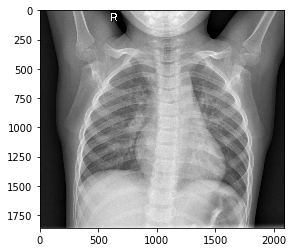

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
%matplotlib inline

DATADIR = "C:/lung ct project/dataset/LUNG"

CATEGORIES = ['NORMAL','CANCER']

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!


In [16]:
print(img_array)

[[ 22  24  24 ...  96  94  93]
 [ 23  24  24 ...  97  94  92]
 [ 24  24  23 ...  99  96  94]
 ...
 [ 49  50  48 ... 119 119 119]
 [ 50  52  53 ... 123 124 123]
 [ 52  53  54 ... 129 128 127]]


In [17]:
print(img_array.shape)

(1858, 2090)


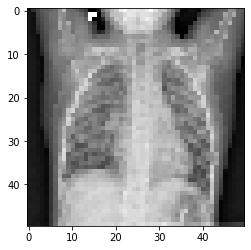

In [18]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

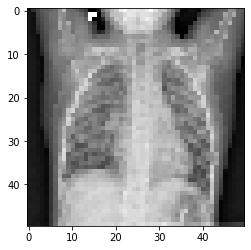

In [19]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1)

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████████████████████████████████████████████████████████████████████████| 3875/3875 [02:34<00:00, 27.79it/s]


5216


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
1
1
1
1
1
0
1


In [10]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 87]
   [104]
   [102]
   ...
   [147]
   [135]
   [100]]

  [[105]
   [111]
   [121]
   ...
   [135]
   [107]
   [116]]

  [[103]
   [105]
   [117]
   ...
   [105]
   [133]
   [151]]

  ...

  [[ 60]
   [131]
   [172]
   ...
   [139]
   [ 73]
   [  5]]

  [[ 62]
   [123]
   [169]
   ...
   [137]
   [ 70]
   [  6]]

  [[ 66]
   [111]
   [174]
   ...
   [139]
   [ 78]
   [  7]]]]


In [12]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)


Instructions for updating:
Colocations handled automatically by placer.
Train on 3651 samples, validate on 1565 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
3651/3651 [==============================] - ETA: 8:20 - loss: 0.6755 - acc: 0.843 - ETA: 6:21 - loss: 1.5011 - acc: 0.781 - ETA: 5:58 - loss: 1.2584 - acc: 0.760 - ETA: 5:56 - loss: 1.1222 - acc: 0.625 - ETA: 5:56 - loss: 1.0400 - acc: 0.537 - ETA: 5:46 - loss: 0.9795 - acc: 0.578 - ETA: 5:40 - loss: 0.9325 - acc: 0.602 - ETA: 5:31 - loss: 0.8962 - acc: 0.613 - ETA: 5:23 - loss: 0.8612 - acc: 0.628 - ETA: 5:21 - loss: 0.8399 - acc: 0.634 - ETA: 5:14 - loss: 0.8043 - acc: 0.653 - ETA: 5:09 - loss: 0.8005 - acc: 0.653 - ETA: 5:05 - loss: 0.8031 - acc: 0.649 - ETA: 4:58 - loss: 0.7770 - acc: 0.665 - ETA: 4:55 - loss: 0.7664 - acc: 0.666 - ETA: 4:51 - loss: 0.7548 - acc: 0.671 - ETA: 4:44 - loss: 0.7476 - acc: 0.672 - ETA: 4:38 - loss: 0.7422 - acc: 0.671 - ETA: 4:32 - loss: 0.7335 - acc: 0.677 - ETA: 4:28 - loss:

3651/3651 [==============================] - ETA: 5:13 - loss: 0.2284 - acc: 0.937 - ETA: 4:58 - loss: 0.2069 - acc: 0.937 - ETA: 5:01 - loss: 0.1551 - acc: 0.958 - ETA: 5:09 - loss: 0.1517 - acc: 0.960 - ETA: 5:15 - loss: 0.1562 - acc: 0.956 - ETA: 5:22 - loss: 0.1415 - acc: 0.963 - ETA: 5:14 - loss: 0.1293 - acc: 0.968 - ETA: 5:11 - loss: 0.1292 - acc: 0.964 - ETA: 5:06 - loss: 0.1260 - acc: 0.965 - ETA: 4:58 - loss: 0.1198 - acc: 0.965 - ETA: 4:57 - loss: 0.1284 - acc: 0.957 - ETA: 4:53 - loss: 0.1224 - acc: 0.960 - ETA: 4:46 - loss: 0.1199 - acc: 0.959 - ETA: 4:40 - loss: 0.1157 - acc: 0.959 - ETA: 4:34 - loss: 0.1133 - acc: 0.962 - ETA: 4:29 - loss: 0.1080 - acc: 0.964 - ETA: 4:26 - loss: 0.1052 - acc: 0.965 - ETA: 4:24 - loss: 0.1073 - acc: 0.965 - ETA: 4:20 - loss: 0.1030 - acc: 0.967 - ETA: 4:17 - loss: 0.1047 - acc: 0.965 - ETA: 4:16 - loss: 0.1009 - acc: 0.967 - ETA: 4:16 - loss: 0.0997 - acc: 0.967 - ETA: 4:12 - loss: 0.0979 - acc: 0.967 - ETA: 4:09 - loss: 0.0973 - acc: 0.9

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      callbacks=[tensorboard])

model.save('64x3-CNN.model')

3-conv-64-nodes-0-dense-1590670061
Train on 3651 samples, validate on 1565 samples
Epoch 1/10
3651/3651 [==============================] - ETA: 1:41 - loss: 0.6932 - acc: 0.500 - ETA: 1:08 - loss: 0.6786 - acc: 0.625 - ETA: 57s - loss: 0.6619 - acc: 0.677 - ETA: 51s - loss: 0.6406 - acc: 0.71 - ETA: 47s - loss: 0.6394 - acc: 0.70 - ETA: 45s - loss: 0.5982 - acc: 0.73 - ETA: 43s - loss: 0.5855 - acc: 0.75 - ETA: 41s - loss: 0.5864 - acc: 0.75 - ETA: 40s - loss: 0.5925 - acc: 0.75 - ETA: 39s - loss: 0.5947 - acc: 0.75 - ETA: 38s - loss: 0.5911 - acc: 0.75 - ETA: 37s - loss: 0.5968 - acc: 0.75 - ETA: 37s - loss: 0.5966 - acc: 0.74 - ETA: 36s - loss: 0.6077 - acc: 0.73 - ETA: 35s - loss: 0.6063 - acc: 0.73 - ETA: 35s - loss: 0.6030 - acc: 0.74 - ETA: 34s - loss: 0.6025 - acc: 0.74 - ETA: 34s - loss: 0.6036 - acc: 0.74 - ETA: 33s - loss: 0.6038 - acc: 0.74 - ETA: 33s - loss: 0.6066 - acc: 0.73 - ETA: 32s - loss: 0.6071 - acc: 0.73 - ETA: 32s - loss: 0.6054 - acc: 0.73 - ETA: 32s - loss: 0.6

3651/3651 [==============================] - ETA: 33s - loss: 0.1398 - acc: 0.96 - ETA: 39s - loss: 0.1618 - acc: 0.96 - ETA: 40s - loss: 0.1290 - acc: 0.97 - ETA: 40s - loss: 0.1275 - acc: 0.97 - ETA: 41s - loss: 0.1358 - acc: 0.96 - ETA: 40s - loss: 0.1511 - acc: 0.95 - ETA: 39s - loss: 0.1633 - acc: 0.95 - ETA: 39s - loss: 0.1540 - acc: 0.95 - ETA: 39s - loss: 0.1512 - acc: 0.95 - ETA: 39s - loss: 0.1538 - acc: 0.94 - ETA: 38s - loss: 0.1652 - acc: 0.94 - ETA: 38s - loss: 0.1728 - acc: 0.94 - ETA: 38s - loss: 0.1680 - acc: 0.94 - ETA: 37s - loss: 0.1659 - acc: 0.94 - ETA: 37s - loss: 0.1631 - acc: 0.94 - ETA: 37s - loss: 0.1598 - acc: 0.95 - ETA: 37s - loss: 0.1547 - acc: 0.95 - ETA: 36s - loss: 0.1534 - acc: 0.95 - ETA: 36s - loss: 0.1520 - acc: 0.95 - ETA: 36s - loss: 0.1486 - acc: 0.95 - ETA: 36s - loss: 0.1464 - acc: 0.95 - ETA: 36s - loss: 0.1554 - acc: 0.95 - ETA: 36s - loss: 0.1525 - acc: 0.95 - ETA: 35s - loss: 0.1481 - acc: 0.95 - ETA: 34s - loss: 0.1499 - acc: 0.95 - ETA: 

3651/3651 [==============================] - ETA: 37s - loss: 0.1309 - acc: 0.93 - ETA: 43s - loss: 0.1241 - acc: 0.93 - ETA: 45s - loss: 0.1038 - acc: 0.94 - ETA: 47s - loss: 0.1202 - acc: 0.93 - ETA: 47s - loss: 0.1661 - acc: 0.91 - ETA: 46s - loss: 0.1529 - acc: 0.92 - ETA: 44s - loss: 0.1464 - acc: 0.92 - ETA: 44s - loss: 0.1468 - acc: 0.92 - ETA: 42s - loss: 0.1661 - acc: 0.91 - ETA: 42s - loss: 0.1566 - acc: 0.91 - ETA: 41s - loss: 0.1606 - acc: 0.92 - ETA: 40s - loss: 0.1544 - acc: 0.92 - ETA: 40s - loss: 0.1558 - acc: 0.92 - ETA: 40s - loss: 0.1496 - acc: 0.92 - ETA: 40s - loss: 0.1439 - acc: 0.93 - ETA: 40s - loss: 0.1372 - acc: 0.93 - ETA: 39s - loss: 0.1313 - acc: 0.93 - ETA: 39s - loss: 0.1312 - acc: 0.94 - ETA: 39s - loss: 0.1260 - acc: 0.94 - ETA: 38s - loss: 0.1277 - acc: 0.94 - ETA: 37s - loss: 0.1302 - acc: 0.94 - ETA: 36s - loss: 0.1331 - acc: 0.94 - ETA: 36s - loss: 0.1298 - acc: 0.94 - ETA: 35s - loss: 0.1275 - acc: 0.94 - ETA: 35s - loss: 0.1271 - acc: 0.94 - ETA: 

3651/3651 [==============================] - ETA: 44s - loss: 0.1537 - acc: 0.93 - ETA: 42s - loss: 0.1068 - acc: 0.96 - ETA: 42s - loss: 0.1034 - acc: 0.96 - ETA: 41s - loss: 0.0975 - acc: 0.96 - ETA: 41s - loss: 0.0998 - acc: 0.96 - ETA: 42s - loss: 0.0979 - acc: 0.96 - ETA: 42s - loss: 0.0948 - acc: 0.96 - ETA: 42s - loss: 0.0859 - acc: 0.96 - ETA: 43s - loss: 0.0811 - acc: 0.96 - ETA: 43s - loss: 0.0784 - acc: 0.96 - ETA: 42s - loss: 0.0743 - acc: 0.97 - ETA: 40s - loss: 0.0692 - acc: 0.97 - ETA: 39s - loss: 0.0676 - acc: 0.97 - ETA: 39s - loss: 0.0740 - acc: 0.96 - ETA: 39s - loss: 0.0893 - acc: 0.96 - ETA: 38s - loss: 0.0901 - acc: 0.96 - ETA: 38s - loss: 0.0867 - acc: 0.96 - ETA: 38s - loss: 0.0877 - acc: 0.96 - ETA: 37s - loss: 0.0880 - acc: 0.96 - ETA: 37s - loss: 0.0872 - acc: 0.96 - ETA: 37s - loss: 0.0892 - acc: 0.96 - ETA: 37s - loss: 0.0876 - acc: 0.96 - ETA: 36s - loss: 0.0859 - acc: 0.96 - ETA: 36s - loss: 0.0846 - acc: 0.96 - ETA: 35s - loss: 0.0826 - acc: 0.96 - ETA: 

3651/3651 [==============================] - ETA: 40s - loss: 0.0230 - acc: 1.00 - ETA: 39s - loss: 0.0232 - acc: 1.00 - ETA: 39s - loss: 0.0279 - acc: 1.00 - ETA: 39s - loss: 0.0284 - acc: 1.00 - ETA: 41s - loss: 0.0281 - acc: 1.00 - ETA: 40s - loss: 0.0344 - acc: 0.99 - ETA: 39s - loss: 0.0405 - acc: 0.99 - ETA: 39s - loss: 0.0403 - acc: 0.99 - ETA: 39s - loss: 0.0411 - acc: 0.99 - ETA: 38s - loss: 0.0438 - acc: 0.99 - ETA: 38s - loss: 0.0420 - acc: 0.99 - ETA: 38s - loss: 0.0421 - acc: 0.98 - ETA: 37s - loss: 0.0509 - acc: 0.98 - ETA: 37s - loss: 0.0482 - acc: 0.98 - ETA: 36s - loss: 0.0540 - acc: 0.98 - ETA: 35s - loss: 0.0514 - acc: 0.98 - ETA: 35s - loss: 0.0521 - acc: 0.98 - ETA: 35s - loss: 0.0495 - acc: 0.98 - ETA: 34s - loss: 0.0526 - acc: 0.98 - ETA: 34s - loss: 0.0732 - acc: 0.97 - ETA: 33s - loss: 0.0722 - acc: 0.97 - ETA: 33s - loss: 0.0710 - acc: 0.97 - ETA: 32s - loss: 0.0684 - acc: 0.97 - ETA: 32s - loss: 0.0680 - acc: 0.97 - ETA: 31s - loss: 0.0763 - acc: 0.97 - ETA: 

In [5]:
import cv2
import tensorflow as tf

CATEGORIES = ['NORMAL','CANCER']  # will use this to convert prediction num to string value


def prepare(filepath):
    IMG_SIZE = 50  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.

In [6]:
model = tf.keras.models.load_model("64x3-CNN.model")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [7]:
prediction = model.predict([prepare('C:/lung ct project/dataset/LUNG/NORMAL/IM-0141-0001.jpeg')])
prediction

array([[0.]], dtype=float32)

In [8]:
print(CATEGORIES[int(prediction[0][0])])

NORMAL


In [9]:
prediction = model.predict([prepare('C:/lung ct project/dataset/LUNG/CANCER/person3_bacteria_10.jpeg')])
print(prediction[0][0])  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

1.0
CANCER


In [14]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,prediction)
